In [150]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [151]:
#load data

imu_data = pd.read_json('data/driving_1/IMU_000_CONFIDENTIAL.json')
imu_data = pd.concat([imu_data, pd.read_json('data/driving_1/IMU_001_CONFIDENTIAL.json')])
imu_data = pd.concat([imu_data, pd.read_json('data/driving_1/IMU_002_CONFIDENTIAL.json')])
imu_data = pd.concat([imu_data, pd.read_json('data/driving_1/IMU_003_CONFIDENTIAL.json')])


#imu_data = pd.read_json('data/walking_1/IMU_000_CONFIDENTIAL.json')
#imu_data = pd.concat([imu_data, pd.read_json('data/walking_1/IMU_001_CONFIDENTIAL.json')])

imu_data[['x', 'y', 'z','','','','']] =imu_data.v.tolist()
imu_data[['time', '', '','']] =imu_data.i.tolist()
imu_data['time_s'] = (imu_data['time'].values - imu_data['time'].iloc[0])* 10**-3
imu_data['y'] = imu_data['y']
imu_data.reset_index(inplace=True)

OBS:
The readings are the force on the object by gravity

X - pointing through ears
Y - pointing straight up
Z - pointing straight forwards

In [152]:
#visualize data
print(imu_data.head())
print(imu_data.shape)
"""
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(imu_data['x'], imu_data['y'], imu_data['z'])
plt.show()
"""

   index  t                                                  v  \
0      0  I  [1.890231, 9.943943, 2.079009, 1.890231, 9.943...   
1      1  I  [1.7970679999999999, 9.867941, 2.010363, 1.797...   
2      2  I  [1.71126, 9.787036, 2.179527, 1.71126, 9.78703...   
3      3  I  [1.645065, 9.610517, 2.125591, 1.645065, 9.610...   
4      4  I  [1.60829, 9.681615, 2.076558, 1.60829, 9.68161...   

                          i         x         y         z              time  \
0  [17103811, 0, 0, 193017]  1.890231  9.943943  2.079009  193017  17103811   
1  [17103827, 0, 0, 193018]  1.797068  9.867941  2.010363  193018  17103827   
2  [17103844, 0, 0, 193019]  1.711260  9.787036  2.179527  193019  17103844   
3  [17103861, 0, 0, 193020]  1.645065  9.610517  2.125591  193020  17103861   
4  [17103877, 0, 0, 193021]  1.608290  9.681615  2.076558  193021  17103877   

   time_s  
0   0.000  
1   0.016  
2   0.033  
3   0.050  
4   0.066  
(58884, 10)


"\nfig = plt.figure()\nax = plt.axes(projection = '3d')\nax.scatter3D(imu_data['x'], imu_data['y'], imu_data['z'])\nplt.show()\n"

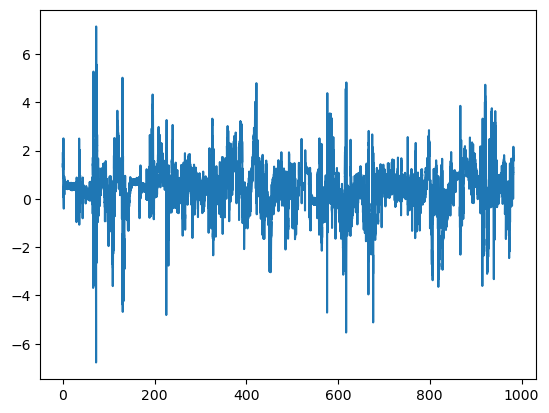

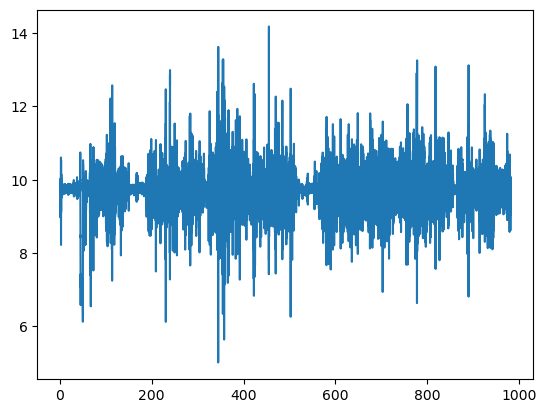

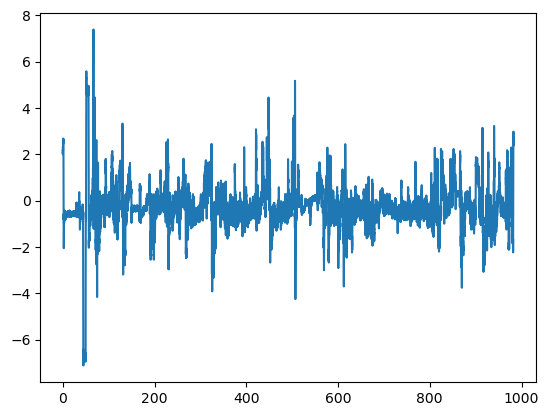

In [153]:
#visualize head movement
plt.figure()
plt.plot(imu_data['time_s'].values, imu_data['x'].values)

plt.figure()
plt.plot(imu_data['time_s'].values, imu_data['y'].values)

plt.figure()
plt.plot(imu_data['time_s'].values, imu_data['z'].values)

plt.show()

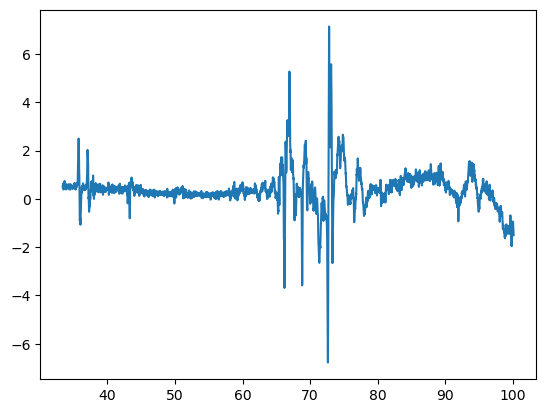

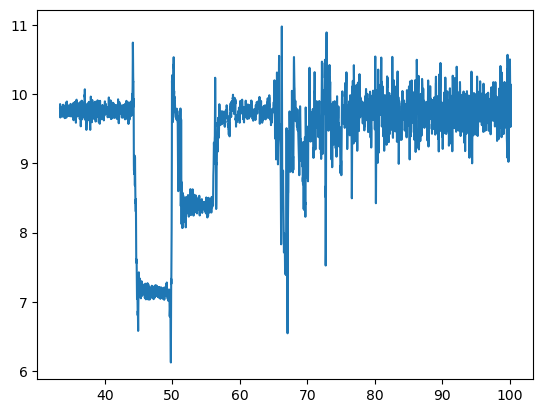

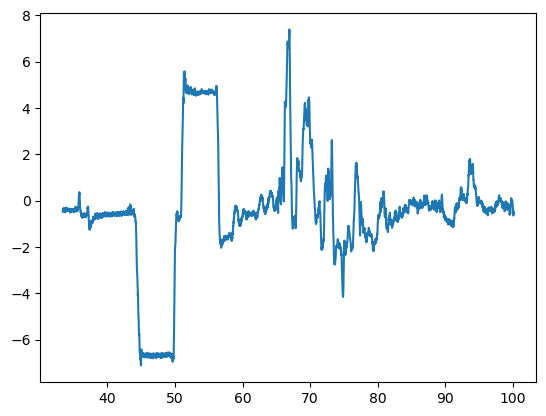

In [154]:
#visualize head movement
plt.figure()
plt.plot(imu_data['time_s'].iloc[2000:6000].values, imu_data['x'].iloc[2000:6000].values)

plt.figure()
plt.plot(imu_data['time_s'].iloc[2000:6000].values, imu_data['y'].iloc[2000:6000].values)

plt.figure()
plt.plot(imu_data['time_s'].iloc[2000:6000].values, imu_data['z'].iloc[2000:6000].values)

plt.show()

In [155]:
print("--x--")
print('Max %.2f' % imu_data['x'].max())
print('Time %i' % ((imu_data['time'] - imu_data['time'].iloc[0])* 10**-3).iloc[imu_data['x'].idxmax()])

print("--y--")
print('Max %.2f' % imu_data['y'].max())
print('Time %i' % ((imu_data['time'] - imu_data['time'].iloc[0])* 10**-3).iloc[imu_data['y'].idxmax()])

print("--z--")
print('Max %.2f' % imu_data['z'].max())
print('Time %i' % ((imu_data['time'] - imu_data['time'].iloc[0])* 10**-3).iloc[imu_data['z'].idxmax()])

--x--
Max 7.14
Time 72
--y--
Max 14.18
Time 455
--z--
Max 7.39
Time 66


In [194]:
#calculate angles
processed_data = pd.DataFrame()
processed_data['time'] = imu_data['time_s']
#processed_data['tilt'] = np.arctan2(np.sqrt(np.power(imu_data['x'], 2) + np.power(imu_data['y'], 2)), imu_data['z'] - 9.82) #head tilt forwards
#processed_data['roll'] = np.arctan2(imu_data['y'], np.sqrt(np.power(imu_data['x'], 2) + np.power(imu_data['z'], 2))) #head tilt side
#processed_data['rho'] = np.arctan2(np.sqrt()) #head tilt forwards if head is tilte to side at the same time

#processed_data['tilt'] = np.arctan2(imu_data['y'], imu_data['z'])
#processed_data['tilt'] = np.arccos(imu_data['y'] , np.sqrt(np.power(imu_data['z'], 2) + np.power(imu_data['x'], 2) + np.power(imu_data['y'], 2)))
#processed_data['roll'] = np.arctan2(imu_data['y'], imu_data['x'])

processed_data['pitch'] = np.arctan2(-imu_data['z'], imu_data['y']) * 180/math.pi
processed_data['roll'] = np.arctan2(-imu_data['x'], imu_data['y']) * 180/math.pi

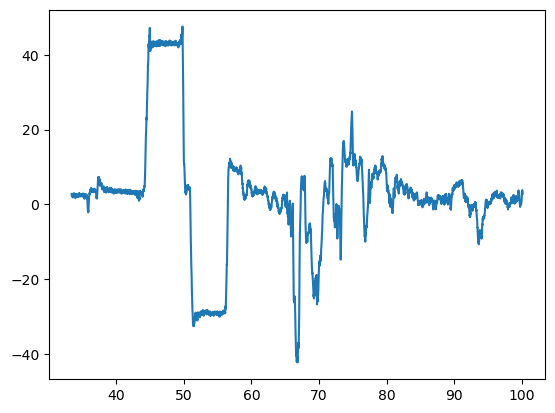

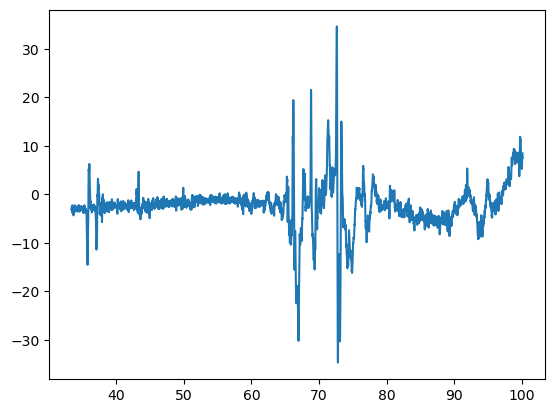

"\nplt.figure()\nplt.plot(processed_data['time'].iloc[2000:4000].values ,processed_data['rho'].iloc[2000:4000].values * 180/math.pi)\nplt.show()\n"

In [195]:
#plot angles
plt.figure()
plt.plot(processed_data['time'].iloc[2000:6000].values ,(processed_data['pitch'].iloc[2000:6000].values))

plt.figure()
plt.plot(processed_data['time'].iloc[2000:6000].values ,(processed_data['roll'].iloc[2000:6000].values))
plt.show()

"""
plt.figure()
plt.plot(processed_data['time'].iloc[2000:4000].values ,processed_data['rho'].iloc[2000:4000].values * 180/math.pi)
plt.show()
"""

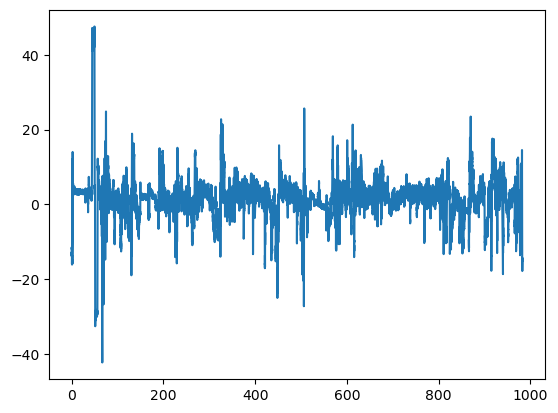

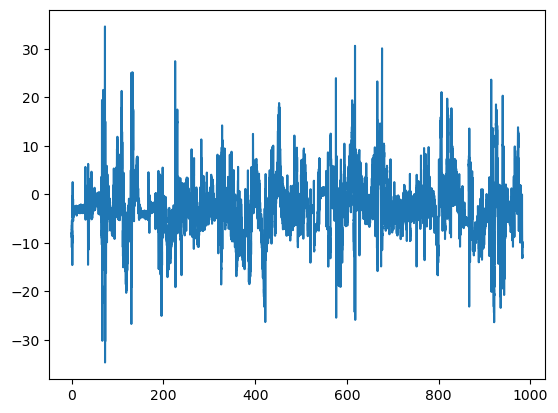

"\nplt.figure()\nplt.plot(processed_data['time'].values ,processed_data['theta'].values * 180/math.pi)\nplt.show()\n"

In [196]:
#plot angles
plt.figure()
plt.plot(processed_data['time'].values ,processed_data['pitch'].values)
plt.show()

plt.figure()
plt.plot(processed_data['time'].values ,processed_data['roll'].values)
plt.show()

"""
plt.figure()
plt.plot(processed_data['time'].values ,processed_data['theta'].values * 180/math.pi)
plt.show()
"""

In [197]:
print("--pitch--")
print('Max %.2f' % processed_data['pitch'].max())
print('Time %i' % (processed_data['time'].iloc[processed_data['pitch'].idxmax()]))

print("--roll--")
print('Max %.2f' % processed_data['roll'].max())
print('Time %i' % (processed_data['time'].iloc[processed_data['roll'].idxmax()]))

"""
print("--theta--")
print('Max %.2f' % processed_data['theta'].max())
print('Time %i' % (processed_data['time'].iloc[processed_data['theta'].idxmax()]))
"""

--pitch--
Max 47.57
Time 49
--roll--
Max 34.63
Time 72


'\nprint("--theta--")\nprint(\'Max %.2f\' % processed_data[\'theta\'].max())\nprint(\'Time %i\' % (processed_data[\'time\'].iloc[processed_data[\'theta\'].idxmax()]))\n'